DATASET : [DIABATES](https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv)

# IMPORTAMOS LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CARGAMOS DATASET

In [3]:
df_diabetes = pd.read_csv('/content/pima-indians-diabetes.csv',header=None)
df_diabetes.head(10)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Class']
df_diabetes.columns = columns
df_diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# EDA

In [6]:
df_diabetes.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Class,int64


In [7]:
df_diabetes.isna().sum().sum()

0

# ENTRENAMIENTO DE MODELO CON RANDOM FOREST

## 1 - DIVIDEMOS NUESTRO DATASET EN VARIABLES INDEPENDIENTES Y VARIABLE DEPENDIENTE(X y Y)

In [9]:
X = df_diabetes.drop('Class',axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
y = df_diabetes['Class']
y

,Class
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


## 2 - DIVIDIMOS LOS DATASETS EN ENTRENAMIENTO Y PRUEBA

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=00000)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(537, 8) (231, 8)
(537,) (231,)


## 3 - CREAMOS NUESTRO MODELO DE RANDOM FOREST

In [14]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=10,random_state=00000)

## 4 - ENTRENAMIENTO NUESTRO MODELO CON LA DATA DE PRUEBA

In [15]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

# EVALUAMOS NUESTRO MODELO

## ACCURACY

In [16]:
from sklearn.metrics import accuracy_score

y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

print(f'El accuracy en train es : {train_accuracy}')
print(f'El accuracy en test est : {test_accuracy}')

El accuracy en train es : 0.9776536312849162
El accuracy en test est : 0.7662337662337663


# GRAFICAMOS LAS VARIABLES MAS IMPORTANTES

In [18]:
feature_importances_df = pd.DataFrame({"feature": list(X.columns),"importance": random_forest.feature_importances_}).sort_values("importance",ascending=False)

feature_importances_df

,feature,importance
1,Glucose,0.252983
7,Age,0.172710
5,BMI,0.157963
6,DiabetesPedigreeFunction,0.118139
3,SkinThickness,0.086799
2,BloodPressure,0.074944
4,Insulin,0.073305
0,Pregnancies,0.063155


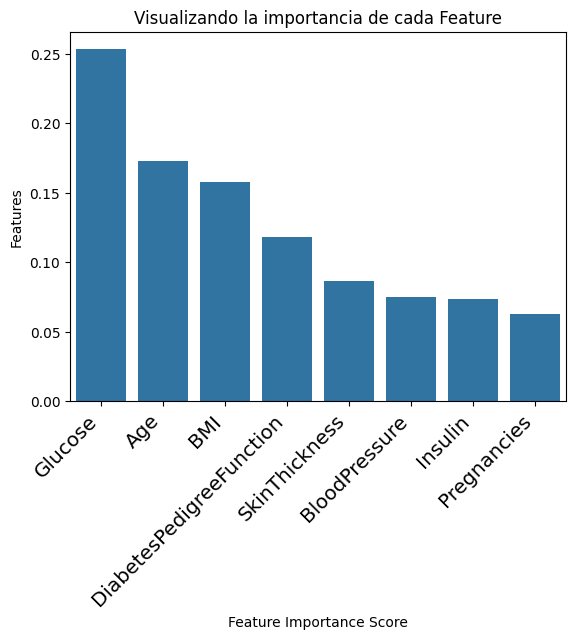

In [20]:
sns.barplot(x=feature_importances_df.feature,y=feature_importances_df.importance)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizando la importancia de cada Feature')
plt.xticks(rotation=45,horizontalalignment ="right",fontweight="light",fontsize="x-large")
plt.show()